In [ ]:
import tensorflow as tf
from tensorflow import keras
df = keras.datasets.fashion_mnist
((imagens_treino, identificacoes_treino), (imagens_teste, identificacoes_teste)) = df.load_data() #Carregando em formato de tuplas
len(imagens_treino)
print("Imagens de treino: ",imagens_treino.shape)
print("Imagens de Teste: ", imagens_teste.shape)
print("Identificações de treino: ", identificacoes_treino.shape)
print("Identificações de Teste: ", identificacoes_teste.shape)

4422102/4422102 [==============================] - 0s 0us/step
Imagens de treino:  (60000, 28, 28)
Imagens de Teste:  (10000, 28, 28)
Identificações de treino:  (60000,)
Identificações de Teste:  (10000,)


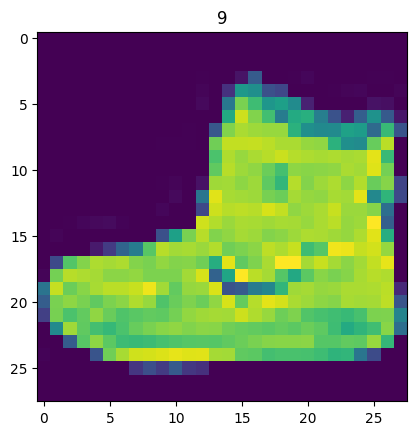

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(imagens_treino[0])
plt.title(identificacoes_treino[0])
plt.show()

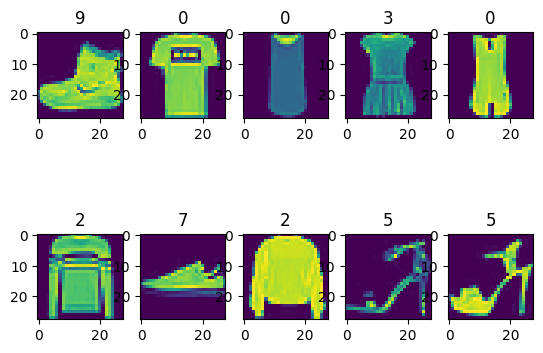

In [ ]:
identificacoes_treino.min()
identificacoes_treino.max() #Array vai de 0 a 9

total_de_classificacoes = 10
for imagem in range(10):
  plt.subplot(2, 5, imagem + 1) #2 linhas e 5 colunas
  plt.imshow(imagens_treino[imagem])
  plt.title(identificacoes_treino[imagem])

### De acordo com a biblioteca do tensorflow, esses números represetam essas roupas:

Label	Description

0	  T-shirt/top

1  Trouser

2	  Pullover

3	  Dress

4	  Coat

5	  Sandal

6	  Shirt

7	  Sneaker

8	  Bag

9	  Ankle boot

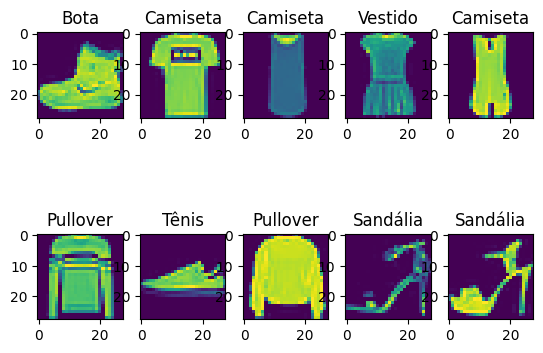

In [ ]:
nome_de_classificacoes = ['Camiseta', 'Calça', 'Pullover', 'Vestido',
                           'Casaco','Sandália', 'Camisa', 'Tênis', 'Bolsa', 'Bota']

for imagem in range(10):
  plt.subplot(2, 5, imagem + 1) #2 linhas e 5 colunas
  plt.imshow(imagens_treino[imagem])
  plt.title(nome_de_classificacoes[identificacoes_treino[imagem]])

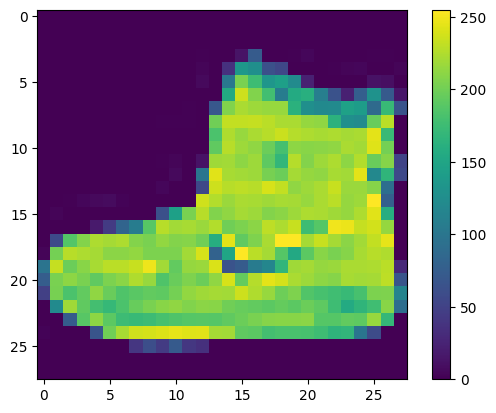

In [ ]:
#Visualizar as cores das imagens
plt.imshow(imagens_treino[0])
plt.colorbar()

## Aplicando keras.Sequential

### keras.layers.Flatten:
- Realiza o achatamento da imagem original para uma imagem de apenas um dimensão

### keras.layers.Dense:
- Representa uma camada de neurônios onde cada neurônio está conectado a todos os neurônios da camada anterior

### Função ReLu:
- A ReLu é uma função linear para entradas positivas e retorna zero para entradas negativas. Isso torna linear por partes, facilitando a propagração de gradientes

### Função Softmax:
- Essa função converte um vetor real em vetor de probabilidades onde a soma dessas probabilidades é igual a 1. Essa probabilidade indica a confiança do modelo em realação a uma classe.
- Um exemplo é quando o modelo quer prever se é uma camisa, o que ele faz é atribuir uma probabilidade para cada classe (camisas, saias, bolsas, etc), e a maior probabilidade atribuída é a resposta para o problema.

In [ ]:
modelo = keras.Sequential([
  keras.layers.Flatten(input_shape=(28, 28)), #28x28 pixels é o tamnho original da imagem #camada de entrada
  keras.layers.Dense(256, activation=tf.nn.relu),#camada oculta
  keras.layers.Dense(10, activation=tf.nn.softmax),#10 pq é o nosso número total de categorias; camada de saída
])

modelo.compile(optimizer = 'adam',
               loss = 'sparse_categorical_crossentropy')

modelo.fit(imagens_treino, identificacoes_treino)

1875/1875 [==============================] - 24s 11ms/step - loss: 3.6732


### Normalização para a diminuição da perda (loss):
- Para isso, plotamos um gráfico para visualizar as cores de cada classe, ao visualizar, percebemos que as cores variam de 1 a 255, o que podemos fazer é normalizar para que essas cores variem apenas de 0 até 1.
- Após a normalização o modelo saiu de um loss de 4.3 para 0.5

###Dropout:
- O Dropout "desliga" de forma aleatória uma fração dos neurônios das camadas ocultas na etapa de treinamento.Isso impede que o modelo se torne excessivamente dependente de qualquer conjunto específico de neurônios, promovendo a generalização e **evitando o overfitting**

In [ ]:
imagens_treino = imagens_treino / 255.0 #colocar .0 já que é float

modelo = keras.Sequential([
  keras.layers.Flatten(input_shape=(28, 28)),#28x28 pixels é o tamnho original da imagem #camada de entrada
  keras.layers.Dense(256, activation=tf.nn.relu),#camada oculta
  keras.layers.Dropout(0.2),
  keras.layers.Dense(10, activation=tf.nn.softmax),#10 pq é o nosso número total de categorias; camada de saída
])

modelo.compile(optimizer = 'adam',
               loss = 'sparse_categorical_crossentropy',
               metrics=['accuracy'])

historico = modelo.fit(imagens_treino, identificacoes_treino, epochs = 10, validation_split=0.2) #adicionando epocas

Epoch 1/10
1500/1500 [==============================] - 10s 6ms/step - loss: 0.5272 - accuracy: 0.8126 - val_loss: 0.3929 - val_accuracy: 0.8576
Epoch 2/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3979 - accuracy: 0.8564 - val_loss: 0.3659 - val_accuracy: 0.8670
Epoch 3/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.3600 - accuracy: 0.8672 - val_loss: 0.3455 - val_accuracy: 0.8746
Epoch 4/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.3404 - accuracy: 0.8741 - val_loss: 0.3320 - val_accuracy: 0.8809
Epoch 5/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.3214 - accuracy: 0.8813 - val_loss: 0.3552 - val_accuracy: 0.8717
Epoch 6/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.3063 - accuracy: 0.8868 - val_loss: 0.3314 - val_accuracy: 0.8800
Epoch 7/10
1500/1500 [==============================] - 8s 6ms/step - loss: 0.2979 - accuracy: 0.8883 - val_loss: 0.3427 - val_accuracy

In [ ]:
historico.history

{'loss': [0.5271756052970886,
  0.3978688418865204,
  0.35997384786605835,
  0.3404056131839752,
  0.3213919997215271,
  0.30626121163368225,
  0.2979121804237366,
  0.2884100377559662,
  0.28005242347717285,
  0.27289822697639465],
 'accuracy': [0.812583327293396,
  0.8564375042915344,
  0.8672083616256714,
  0.8741458058357239,
  0.8812708258628845,
  0.8867916464805603,
  0.8882916569709778,
  0.8934999704360962,
  0.895312488079071,
  0.8975208401679993],
 'val_loss': [0.3929213881492615,
  0.36591723561286926,
  0.34548985958099365,
  0.3320390284061432,
  0.3552277684211731,
  0.3314415216445923,
  0.34267517924308777,
  0.33352380990982056,
  0.3180497884750366,
  0.3415667712688446],
 'val_accuracy': [0.8575833439826965,
  0.8669999837875366,
  0.8745833039283752,
  0.8809166550636292,
  0.871666669845581,
  0.8799999952316284,
  0.8709999918937683,
  0.8808333277702332,
  0.8889166712760925,
  0.8834166526794434]}

## Testando modelo

In [ ]:
sumario = modelo.summary()
sumario

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 256)               200960    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 10)                2570      
                                                                 
Total params: 203530 (795.04 KB)
Trainable params: 203530 (795.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Verificando os pesos da primeira camada

In [ ]:
pesos_camada_dense = modelo.layers[1].get_weights()[0]
pesos_camada_dense

array([[-0.04605325,  0.00486633, -0.03394858, ...,  0.00158664,
        -0.03292784,  0.16659251],
       [ 0.06738751, -0.10256655,  0.07406829, ...,  0.06806771,
        -0.00535069, -0.12003224],
       [ 0.00955119, -0.24161862,  0.11303201, ...,  0.14665866,
        -0.22768986, -0.12700245],
       ...,
       [ 0.17470594, -0.0629786 ,  0.13282478, ..., -0.03564861,
        -0.31220186,  0.15080382],
       [ 0.37987894, -0.01080455, -0.07153969, ..., -0.02866127,
        -0.40112022, -0.13078333],
       [ 0.06766532, -0.11572434, -0.17739846, ...,  0.03800811,
        -0.08413236,  0.09231233]], dtype=float32)

### Colocando pesos aleatórios

In [ ]:
vieses_camada_dense_zerados = np.zeros((256, ))

In [ ]:
vieses_camada_dense = modelo.layers[1].get_weights()[1]
vieses_camada_dense.shape

(256,)

In [ ]:
1

1

In [ ]:
pesos_camada_dense.shape
pesos_camada_dense_zerados = np.zeros((784, 256))

pesos_camada_dense_aleatorios = np.random.rand(784, 256)


modelo.layers[1].set_weights(
    [pesos_camada_dense_aleatorios, vieses_camada_dense_zerados]
)

modelo.layers[1].get_weights()

[array([[0.6442177 , 0.06322847, 0.28611052, ..., 0.3768717 , 0.33634463,
         0.34359145],
        [0.03144008, 0.3012033 , 0.7283938 , ..., 0.67401546, 0.06265336,
         0.403074  ],
        [0.52908635, 0.9417539 , 0.25919107, ..., 0.29767928, 0.9227857 ,
         0.9387003 ],
        ...,
        [0.20080769, 0.03152622, 0.17277408, ..., 0.0145023 , 0.0266611 ,
         0.4405905 ],
        [0.5286198 , 0.54823387, 0.03193301, ..., 0.58787066, 0.5095004 ,
         0.40541956],
        [0.7543582 , 0.09437852, 0.60787535, ..., 0.8696967 , 0.6423223 ,
         0.28282687]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.

In [ ]:
adam = keras.optimizers.Adam(learning_rate=0.002)

callbacks = [keras.callbacks.EarlyStopping(monitor = 'val_loss'),
             keras.callbacks.ModelCheckpoint(filepath='melhor_modelo.hdf5',
                                             monitor='val_loss',save_best_only=True)] #paramentro para parar mais cedo as validações

modelo.compile(optimizer= adam,
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

historico = modelo.fit(imagens_treino, identificacoes_treino, batch_size = 500,
                       epochs=5, validation_split=0.2, callbacks=callbacks)

Epoch 1/5
96/96 [==============================] - 2s 18ms/step - loss: 0.3040 - accuracy: 0.8895 - val_loss: 0.3598 - val_accuracy: 0.8830
Epoch 2/5
 9/96 [=>............................] - ETA: 1s - loss: 0.2787 - accuracy: 0.8993

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


96/96 [==============================] - 2s 23ms/step - loss: 0.2951 - accuracy: 0.8923 - val_loss: 0.3684 - val_accuracy: 0.8816


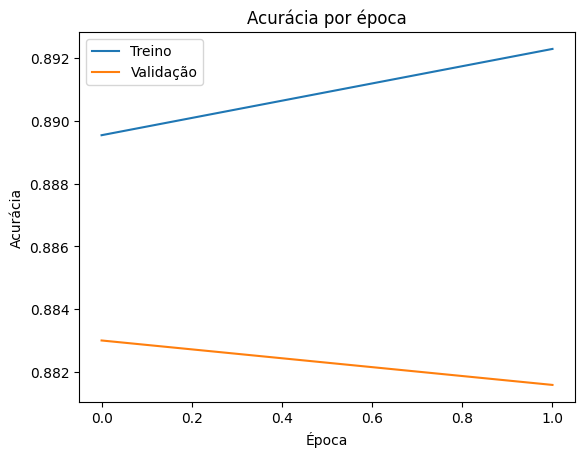

In [ ]:
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Acurácia por época')
plt.xlabel('Época')
plt.ylabel('Acurácia')
plt.legend(['Treino', 'Validação'])

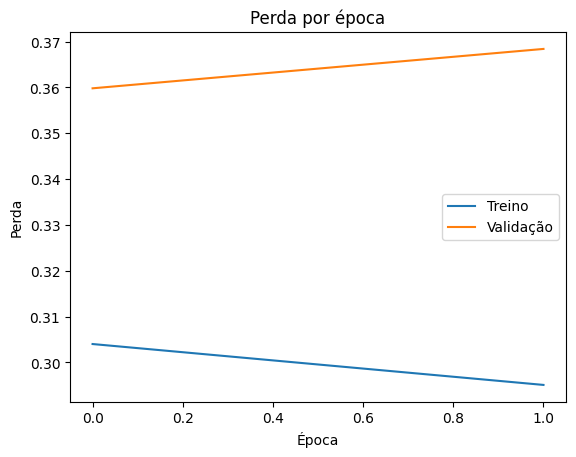

In [ ]:
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Perda por época')
plt.xlabel('Época')
plt.ylabel('Perda')
plt.legend(['Treino', 'Validação'])

### Se no gráfico de acurácia a linha de treino está aumentando e a teste abaixando o modelo está com overfitting

### Se no gráfico de perda o erro de teste está muito menor que o erro de validação o modelo está com overfitting

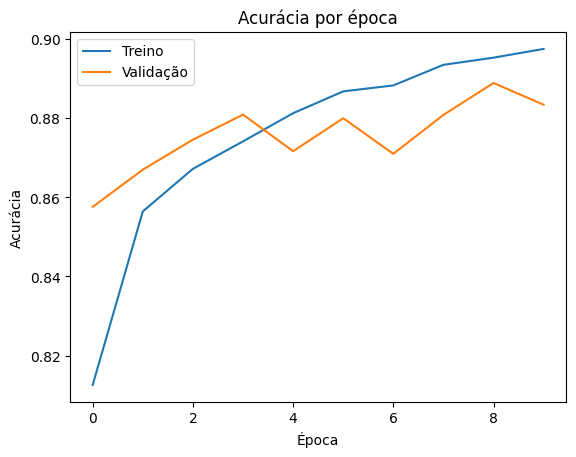

In [ ]:
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Acurácia por época')
plt.xlabel('Época')
plt.ylabel('Acurácia')
plt.legend(['Treino', 'Validação'])

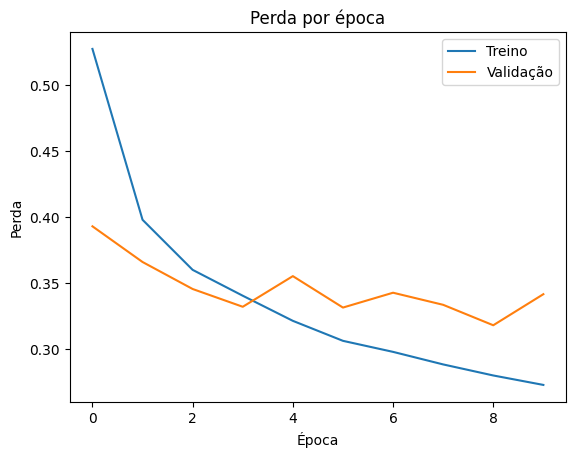

In [ ]:
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Perda por época')
plt.xlabel('Época')
plt.ylabel('Perda')
plt.legend(['Treino', 'Validação'])

##Salvando Modelo

In [ ]:
from tensorflow.keras.models import load_model
modelo.save('modelo.h5')
modelo_salvo = load_model('modelo.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
import numpy as np
testes = modelo.predict(imagens_teste)
print('Resultado do teste: ',np.argmax(testes[1]))
print("Número da imagem de teste: ", identificacoes_teste[1])

testes_modelo_salvo = modelo_salvo.predict(imagens_teste)
print('Resultado do teste salvo: ',np.argmax(testes_modelo_salvo[1]))
print("Número da imagem de teste: ", identificacoes_teste[1])

313/313 [==============================] - 1s 3ms/step
Resultado do teste:  2
Número da imagem de teste:  2
313/313 [==============================] - 1s 2ms/step
Resultado do teste salvo:  2
Número da imagem de teste:  2


In [ ]:
loss, acc = modelo.evaluate(imagens_teste, identificacoes_teste)
print("Perda do teste: ", loss)
print("Acurácia do teste: ", acc )

313/313 [==============================] - 1s 4ms/step - loss: 61.2696 - accuracy: 0.8656
Perda do teste:  61.26955032348633
Acurácia do teste:  0.8655999898910522
